In [1]:
cd /g/data/jk72/deg581/shacom/ana/notebooks

/g/data/jk72/deg581/shacom/ana/notebooks


In [2]:
# load modules
## Data processing and DA modules
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
## Dealing with big data and netcdf
import xarray as xr
from netCDF4 import Dataset
## ROMS packages
from xgcm import Grid
## color maps
import cmaps
import cmocean
## mapping packages
import cartopy.crs as ccrs
import cartopy.feature as cfeature
## System tools and python configuration
import os
import glob
import repackage
repackage.add('../../')
repackage.add('../')

'/jobfs/108309855.gadi-pbs'

# load model output

In [4]:


FilePath='/g/data/jk72/deg581/shacom/mdl/shackleton_repeatyear/' # Truth file settings
prefix='roms_his_'
timeRange = [6, 8]
datelist = np.array(range(timeRange[0],timeRange[1],1))

def add_zeros_to_4(date):
    if date<10:
        to_add = '000'
    elif date>9 & date<100:
        to_add = '00'
    elif date>99 & date < 1000:
        to_add = '0'
    else: 
        to_add = ''
    return to_add

def generateFileList(FilePath,prefix,datelist):
    filelist=[FilePath+prefix+add_zeros_to_4(datelist[0])+str(datelist[0])+'.nc']
    for dates in datelist[1:]:
        filenameToAppend=FilePath+prefix+add_zeros_to_4(dates)+str(dates)+'.nc'
        filelist.append(filenameToAppend)
    return filelist

fl=generateFileList(FilePath,prefix,datelist)
print(fl)

# ds=loadOverlappedNetcdfFileList(filelist=fl,overlapDays=7)

ds = xr.open_mfdataset(fl,chunks = {'ocean_time':1}, data_vars='minimal', compat='override',coords='minimal',parallel='False',join='right')

print(ds.nbytes/1e9,'G')

['/g/data/jk72/deg581/shacom/mdl/shackleton_repeatyear/roms_his_0006.nc', '/g/data/jk72/deg581/shacom/mdl/shackleton_repeatyear/roms_his_0007.nc']
22.56314984 G


In [5]:
ds = ds.drop_vars(['Tb','Sb','ubar_eastward','vbar_northward','w','shflux','ssflux','sustr','svstr','m','zeta','rho'])
print(ds.nbytes/1e9,'G')
ds

16.034389 G


<xarray.Dataset>
Dimensions:        (tracer: 2, boundary: 4, s_rho: 25, s_w: 26, eta_rho: 195,
                    xi_rho: 188, eta_u: 195, xi_u: 187, eta_v: 194, xi_v: 188,
                    eta_psi: 194, xi_psi: 187, ocean_time: 730)
Coordinates:
  * s_rho          (s_rho) float64 -0.98 -0.94 -0.9 -0.86 ... -0.1 -0.06 -0.02
  * s_w            (s_w) float64 -1.0 -0.96 -0.92 -0.88 ... -0.08 -0.04 0.0
    x_rho          (eta_rho, xi_rho) float64 dask.array<chunksize=(195, 188), meta=np.ndarray>
    y_rho          (eta_rho, xi_rho) float64 dask.array<chunksize=(195, 188), meta=np.ndarray>
    x_u            (eta_u, xi_u) float64 dask.array<chunksize=(195, 187), meta=np.ndarray>
    y_u            (eta_u, xi_u) float64 dask.array<chunksize=(195, 187), meta=np.ndarray>
    x_v            (eta_v, xi_v) float64 dask.array<chunksize=(194, 188), meta=np.ndarray>
    y_v            (eta_v, xi_v) float64 dask.array<chunksize=(194, 188), meta=np.ndarray>
    x_psi          (eta_psi, xi_psi) float64 dask.array<chunksize=(194, 187), meta=np.ndarray>
    y_psi          (eta_psi, xi_psi) float64 dask.array<chunksize=(194, 187), meta=np.ndarray>
  * ocean_time     (ocean_time) datetime64[ns] 2012-01-01 ... 2013-12-30
Dimensions without coordinates: tracer, boundary, eta_rho, xi_rho, eta_u, xi_u,
                                eta_v, xi_v, eta_psi, xi_psi
Data variables: (12/76)
    ntimes         int32 ...
    ndtfast        int32 ...
    dt             float64 ...
    dtfast         float64 ...
    dstart         datetime64[ns] ...
    nHIS           int32 ...
    ...             ...
    u              (ocean_time, s_rho, eta_u, xi_u) float32 dask.array<chunksize=(1, 25, 195, 187), meta=np.ndarray>
    v              (ocean_time, s_rho, eta_v, xi_v) float32 dask.array<chunksize=(1, 25, 194, 188), meta=np.ndarray>
    u_eastward     (ocean_time, s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 25, 195, 188), meta=np.ndarray>
    v_northward    (ocean_time, s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 25, 195, 188), meta=np.ndarray>
    temp           (ocean_time, s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 25, 195, 188), meta=np.ndarray>
    salt           (ocean_time, s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 25, 195, 188), meta=np.ndarray>
Attributes: (12/35)
    file:              roms_his_0006.nc
    format:            netCDF-3 64bit offset file
    Conventions:       CF-1.4, SGRID-0.3
    type:              ROMS/TOMS history file
    title:             Shackleton Ice Shelf-ocean Application
    var_info:          ROMS/External/varinfo.yaml
    ...                ...
    compiler_command:  /apps/openmpi/4.0.2/bin/mpif90
    compiler_flags:    -fp-model precise -heap-arrays -ip -O3 -traceback -che...
    tiling:            016x018
    history:           ROMS/TOMS, Version 4.1, Thursday - February 15, 2024 -...
    ana_file:          ROMS/Functionals/ana_btflux.h, ROMS/Functionals/ana_sr...
    CPP_options:       SHACKLETON, ANA_BSFLUX, ANA_BTFLUX, ANA_SRFLUX, ASSUME...

In [6]:
# special addition because x_rho and y_rho are in grd file only - update this to remove once re-run
grd = xr.open_dataset('/g/data/jk72/deg581/shackleton-setup/data/proc/shac_2km_v1_grd.nc')
ds['x_rho'] = grd.x_rho
ds['y_rho'] = grd.y_rho

# load access forcing

In [7]:
access_path = os.path.join('/g/data/ik11/outputs/access-om2-01/01deg_jra55v150_iaf_cycle1/')
access_sub_paths = ['./output196/ocean/','./output197/ocean/','./output198/ocean/','./output199/ocean/']


#temp 
file_list=[]
file_name_format = 'ocean-3d-temp-1-monthly-mean-ym_2007_*.nc'
for subfolder in access_sub_paths:
    file_list = file_list+glob.glob(access_path+subfolder+file_name_format)
theta_full = xr.open_mfdataset(file_list,decode_times=True)

# #salt
file_list=[]
file_name_format = 'ocean-3d-salt-1-monthly-mean-ym_2007_*.nc'
for subfolder in access_sub_paths:
    file_list = file_list+glob.glob(access_path+subfolder+file_name_format)
salt_full = xr.open_mfdataset(file_list,decode_times=True)

# #uvel
file_list=[]
file_name_format = 'ocean-3d-u-1-monthly-mean-ym_2007_*.nc'
for subfolder in access_sub_paths:
    file_list = file_list+glob.glob(access_path+subfolder+file_name_format)
uvel_full = xr.open_mfdataset(file_list,decode_times=True)

# #vvel
file_list=[]
file_name_format = 'ocean-3d-v-1-monthly-mean-ym_2007_*.nc'
for subfolder in access_sub_paths:
    file_list = file_list+glob.glob(access_path+subfolder+file_name_format)
vvel_full = xr.open_mfdataset(file_list,decode_times=True)

In [8]:
grd.lon_rho.min().values, grd.lon_rho.max().values,grd.lat_rho.min().values, grd.lat_rho.max().values

grd_lon_ax = np.array((grd.lon_rho.min().values*0.9, grd.lon_rho.max().values*1.1))
grd_lat_ax = np.array((grd.lat_rho.min().values*1.1, grd.lat_rho.max().values*0.9))

print('re-mapping')
salt_full =    salt_full.assign_coords({'xt_ocean': (salt_full['xt_ocean'] + 360) % 360}).sortby('xt_ocean')
theta_full = theta_full.assign_coords({'xt_ocean': (theta_full['xt_ocean'] + 360) % 360}).sortby('xt_ocean')
uvel_full =    uvel_full.assign_coords({'xu_ocean': (uvel_full['xu_ocean'] + 360) % 360}).sortby('xu_ocean')
vvel_full =    vvel_full.assign_coords({'xu_ocean': (vvel_full['xu_ocean'] + 360) % 360}).sortby('xu_ocean')

# subset
print('subsetting')
salt = salt_full.sel(yt_ocean=slice(*grd_lat_ax),xt_ocean=slice(*grd_lon_ax))
theta = theta_full.sel(yt_ocean=slice(*grd_lat_ax),xt_ocean=slice(*grd_lon_ax))
uvel = uvel_full.sel(yu_ocean=slice(*grd_lat_ax),xu_ocean=slice(*grd_lon_ax))
vvel = vvel_full.sel(yu_ocean=slice(*grd_lat_ax),xu_ocean=slice(*grd_lon_ax))
# salt.salt.isel(time=0,st_ocean=20).plot(vmin=35.4,vmax=35.8)

re-mapping
subsetting


/g/data/jk72/deg581/miniconda3/envs/devel3.11/lib/python3.11/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/g/data/jk72/deg581/miniconda3/envs/devel3.11/lib/python3.11/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
 

In [9]:
access_u = uvel.u.isel(time=0,st_ocean=0).load()
access_v = vvel.v.isel(time=0,st_ocean=0).load()


# load forcing file 

In [10]:
# special addition because x_rho and y_rho are in grd file only - update this to remove once re-run
frc = xr.open_dataset('/g/data/jk72/deg581/shackleton-setup/data/proc/shac_2km_bry.nc')


# now compare velocities to start with

In [11]:
access_u

<xarray.DataArray 'u' (yu_ocean: 373, xu_ocean: 289)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [0.03141041, 0.03364389, 0.03663352, ..., 0.10119729, 0.11387399,
        0.12552625],
       [0.08122846, 0.08349059, 0.0863064 , ..., 0.10697743, 0.11926212,
        0.13089849],
       [0.1200491 , 0.12631185, 0.13179567, ..., 0.1203021 , 0.13073018,
        0.14112501]], dtype=float32)
Coordinates:
  * xu_ocean  (xu_ocean) float64 84.6 84.7 84.8 84.9 ... 113.1 113.2 113.3 113.4
  * yu_ocean  (yu_ocean) float64 -73.65 -73.61 -73.57 ... -57.05 -56.99 -56.94
    st_ocean  float64 0.5413
    time      datetime64[ns] 2007-01-16T12:00:00
Attributes:
    long_name:      i-current
    units:          m/sec
    valid_range:    [-10.  10.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    coordinates:    geolon_c geolat_c
    standard_name:  sea_water_x_velocity

(93.0, 103.0, -67.0, -62.0)

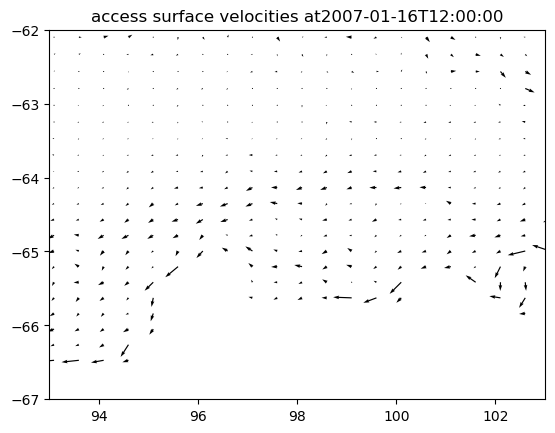

In [12]:
#access
plt.quiver(access_u.xu_ocean[0:-1:5],access_u.yu_ocean[0:-1:5],access_u[0:-1:5,0:-1:5],access_v[0:-1:5,0:-1:5])
plt.title('access surface velocities at2007-01-16T12:00:00')
plt.axis((93,103,-67,-62))

In [13]:
roms_ue = ds.u_eastward.sel(ocean_time='2013-01-16',method='nearest').isel(s_rho=-1)
roms_vn = ds.v_northward.sel(ocean_time='2013-01-16',method='nearest').isel(s_rho=-1)

(93.0, 103.0, -67.0, -62.0)

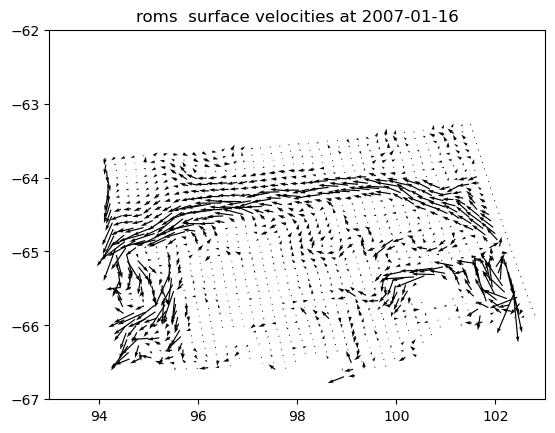

In [14]:
#access
plt.quiver(grd.lon_rho[0:-1:5,0:-1:5],grd.lat_rho[0:-1:5,0:-1:5],roms_ue[0:-1:5,0:-1:5],roms_vn[0:-1:5,0:-1:5])
plt.title('roms  surface velocities at 2007-01-16')
plt.axis((93,103,-67,-62))

# check rotation angles

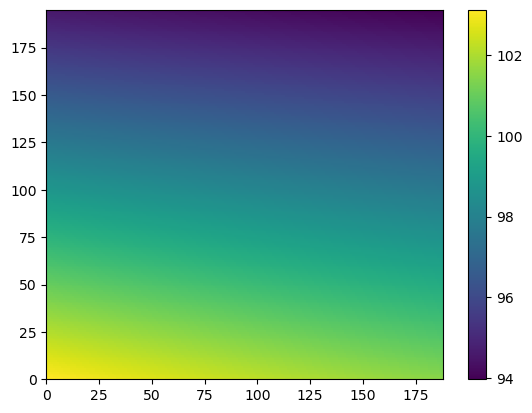

In [15]:
angle1 = grd.lon_rho/180.0*np.pi

plt.pcolormesh(np.rad2deg(angle1))
plt.colorbar()


Im really not sure if this is correct!


Text(0.5, 1.0, 'angle [converted to degrees] between XI-axis and EAST')

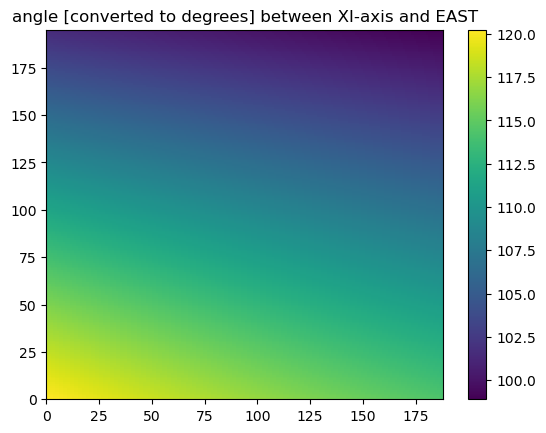

In [17]:

_,dxdxi = np.gradient(grd.lon_rho)
_,dydxi = np.gradient(grd.lat_rho)

angle2 = np.arctan2(dydxi,dxdxi)
print('I''m really not sure if this is correct!')

plt.pcolormesh(np.rad2deg(angle2))
plt.colorbar()
plt.title('angle [converted to degrees] between XI-axis and EAST')

# Plot boundrya forcing temp/salt/velocity

In [25]:
grd
# set any grid data here.

Zo_rho = (ds.hc * ds.s_rho + ds.Cs_r * ds.h) / (ds.hc + ds.h)
z_rho0 = (ds.zice) + ((ds.zice) + ds.h) * Zo_rho
    
ds.coords['z_rho0'] = z_rho0.where(ds.mask_rho, 0).transpose('s_rho', 'eta_rho', 'xi_rho')





/jobfs/108309855.gadi-pbs/ipykernel_1070161/305786228.py:3: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(ds.x_rho.isel(eta_rho=0),ds.z_rho0.isel(eta_rho=0),frc.temp_south.isel(temp_time=3),cmap='cmo.thermal')


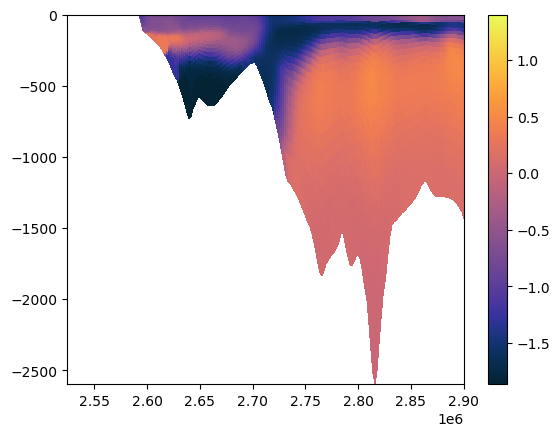

In [31]:
# model-south(bottom) boundary
plt
plt.pcolormesh(ds.x_rho.isel(eta_rho=0),ds.z_rho0.isel(eta_rho=0),frc.temp_south.isel(temp_time=3),cmap='cmo.thermal')
plt.colorbar()

/jobfs/108309855.gadi-pbs/ipykernel_1070161/2301243578.py:3: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(ds.x_rho.isel(eta_rho=-1),ds.z_rho0.isel(eta_rho=-1),frc.temp_north.isel(temp_time=tt),cmap='cmo.thermal')


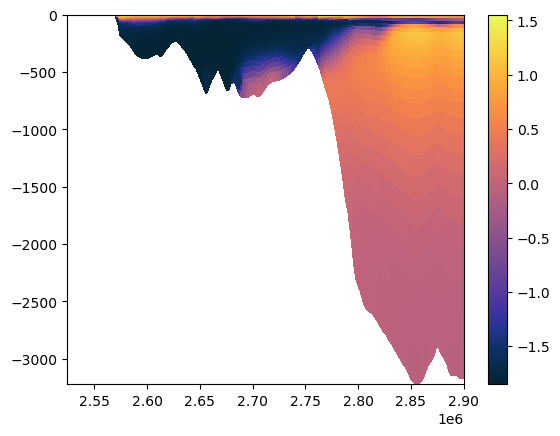

In [33]:
# model-north(top) boundary
tt=0
plt.pcolormesh(ds.x_rho.isel(eta_rho=-1),ds.z_rho0.isel(eta_rho=-1),frc.temp_north.isel(temp_time=tt),cmap='cmo.thermal')
plt.colorbar()

/jobfs/108309855.gadi-pbs/ipykernel_1070161/315483387.py:3: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(ds.x_rho.isel(xi_rho=-1),ds.z_rho0.isel(xi_rho=-1),frc.temp_east.isel(temp_time=tt),cmap='cmo.thermal')


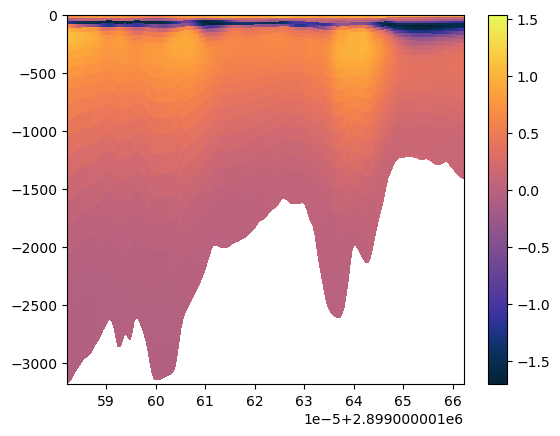

In [34]:
# model-east(right) boundary
tt=0
plt.pcolormesh(ds.x_rho.isel(xi_rho=-1),ds.z_rho0.isel(xi_rho=-1),frc.temp_east.isel(temp_time=tt),cmap='cmo.thermal')
plt.colorbar()

# movies

In [ ]:
# model-south(bottom) boundary
plt
plt.pcolormesh(ds.x_rho.isel(eta_rho=0),ds.z_rho0.isel(eta_rho=0),frc.temp_south.isel(temp_time=3),cmap='cmo.thermal')
plt.colorbar()

In [50]:
import matplotlib.animation as animation

temp=frc.temp_south
# Get a handle on the figure and the axes
fig, ax = plt.subplots(figsize=(12,6))
# Plot the initial frame.
cax = plt.pcolormesh(ds.x_rho.isel(eta_rho=0),ds.z_rho0.isel(eta_rho=0),temp.isel(temp_time=3),
    cmap='cmo.thermal',
    vmin=-2, vmax=0,
)
plt.colorbar(extend='neither')
plt.close()
# Next we need to create a function that updates the values for the colormesh, as well as the title.
def animate(frame):
    cax.set_array(temp.isel(temp_time=frame).values.flatten())
    ax.set_title("Time = " + str(temp.coords['temp_time'].values[frame]))
# Finally, we use the animation module to create the animation.
ani = animation.FuncAnimation(
    fig,             # figure
    animate,         # name of the function above
    frames=12,       # Could also be iterable or list
    interval=200     # ms between frames
)

from IPython.display import HTML
HTML(ani.to_jshtml())

/jobfs/108309855.gadi-pbs/ipykernel_1070161/1203037758.py:7: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  cax = plt.pcolormesh(ds.x_rho.isel(eta_rho=0),ds.z_rho0.isel(eta_rho=0),temp.isel(temp_time=3),
